In [25]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score

In [26]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [27]:
data['value_eur'] = np.log(data['value_eur'])

y = data['value_eur']
x = data.drop(columns= 'value_eur')

x

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
0,1,93,93,320000.0,34,170,72,2023.0,0,4,...,0,0,0,0,0,0,0,0,0,0
1,1,92,92,270000.0,32,185,81,2023.0,1,4,...,0,0,0,0,0,0,0,0,0,0
2,1,91,91,270000.0,36,187,83,2023.0,1,4,...,0,0,0,0,0,0,0,0,0,0
3,1,91,91,270000.0,29,175,68,2025.0,1,5,...,0,0,0,0,0,0,0,0,0,0
4,2,91,91,350000.0,30,181,70,2025.0,1,5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17036,2,47,52,1000.0,22,180,64,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17037,2,47,59,500.0,19,175,70,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17038,2,47,55,500.0,21,178,72,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0
17039,1,47,60,500.0,19,173,66,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [28]:
x_trai, x_tes, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=0
)

# scaler = MinMaxScaler()
scaler = StandardScaler()
x_train = scaler.fit_transform(x_trai)
x_test = scaler.transform(x_tes)

x_train

array([[-1.18158287,  0.45282297,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.7278556 , -0.20418031, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287, -0.28510114, -1.19594441, ..., -0.08377233,
        -0.02266631, -0.02841789],
       ...,
       [-0.04941603, -0.13751631,  1.44875986, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-0.04941603, -0.28510114,  0.12640773, ..., -0.08377233,
        -0.02266631, -0.02841789],
       [-1.18158287,  1.04316225,  1.61405388, ..., -0.08377233,
        -0.02266631, -0.02841789]])

In [29]:
svr = SVR().fit(x_train, y_train)

In [30]:
y_train_pred = svr.predict(x_train)

In [31]:
train_r2s = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_evs = explained_variance_score(y_train, y_train_pred)

print(train_r2s, train_mae, train_mse, train_rmse, train_evs)

0.9724445350817226 0.1369673068234391 0.039563969684278805 0.19890693724523237 0.9724802514854451


In [32]:
y_test_pred = svr.predict(x_test)

In [33]:
test_r2s = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_evs = explained_variance_score(y_test, y_test_pred)

print(test_r2s, test_mae, test_mse, test_rmse, test_evs)

0.9393509152064106 0.19968678592141628 0.08705121470076112 0.29504442835064876 0.9393687825222087


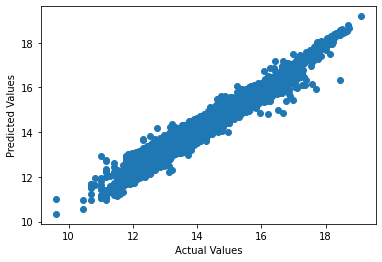

In [34]:
plt.scatter(y_train, y_train_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

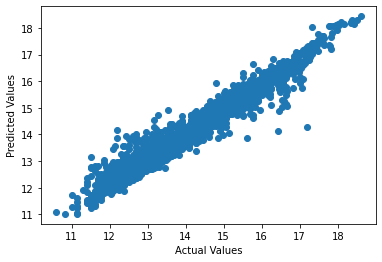

In [35]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [36]:
cross_val_score_train = cross_val_score(svr, x_train, y_train, scoring='r2', cv=10)
print(np.mean(cross_val_score_train))

0.9383979196321175


In [37]:
cross_val_score_test = cross_val_score(svr, x_test, y_test, scoring='r2', cv=10)
print(np.mean(cross_val_score_test))

0.8850355495187996


In [51]:
params = {
   'C': [0.001, 0.01, 0.1, 1],
   'gamma': [0.001, 0.01, 0.1, 1],
   'epsilon': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(
   SVR(kernel='linear'),
   params,
   cv=5,
   n_jobs=-1, # This uses all available CPU cores which improves performance
   error_score='raise', # If there's any error, this raises the exact error instead of a more vague error. 
   scoring='neg_mean_squared_error'
)
grid_search.fit(x_train[:2000], y_train[:2000])

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

train_score = best_model.score(x_train, y_train)
test_score = best_model.score(x_test, y_test)

print('train: ' + str(train_score))
print('test: ' + str(test_score))
print('mse: ' + str(mse))

train: 0.9707967489729407
test: 0.9703021525391691
mse: 0.042626095748381485


In [52]:
best_params

{'C': 1, 'epsilon': 0.1, 'gamma': 0.001}